## 모듈 및 데이터 불러오기

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './데이터분석/인강/3. 패스트캠퍼스/1. 데이터분석 치타반 O/치타반 강의자료/ch5-강의자료및코드 O/galaxy.csv'
data = pd.read_csv(path)
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


## 데이터 특성 확인

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [4]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


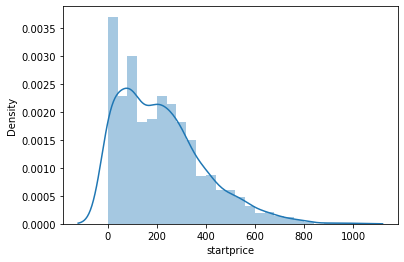

In [5]:
sns.distplot(data['startprice'])

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


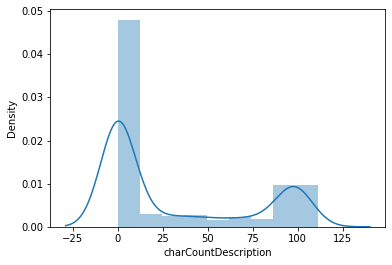

In [6]:
sns.distplot(data['charCountDescription'])

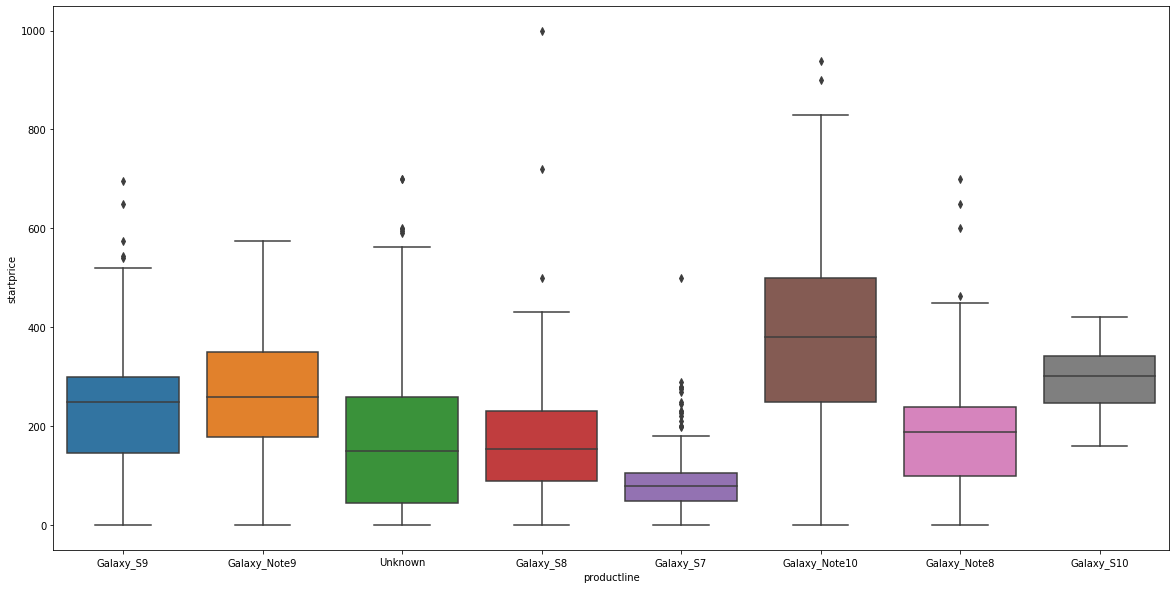

In [7]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'productline', y = 'startprice', data = data)

## 결측치 처리

In [9]:
data.isna().sum()

BuyItNow                  0
startprice                0
carrier                 306
color                   593
productline               0
noDescription             0
charCountDescription      0
upperCaseDescription      0
sold                      0
dtype: int64

In [10]:
data.isna().sum() / len(data)     # 전체 데이터 중 결측치가 차지하는 비중

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [12]:
data = data.fillna('Unknown')     # 결측치가 있는 칼럼이 문자형이므로 평균이나 중앙값이 아닌 unknown으로 채움
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


## 카테고리 변수 처리

In [14]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()     # 각 칼럼의 구성 확인

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [21]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [22]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [13]:
data['carrier'].value_counts()     # carrier칼럼의 구성성분이 어떤 것이 있고 각각 몇개씩 있는지 확인

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [15]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [18]:
# color 칼럼의 black 종류를 하나로 통합시켜줄 함수

def black(x):
    if x in ['Midnight Black', 'Aura Black', 'Prism Black']:
        return 'Black'
    else:
        return x

In [19]:
# color칼럼에 black 함수 적용(apply와 lambda 활용)

data['color'] = data['color'].apply(lambda x: black(x))

In [20]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [23]:
# 카테고리 변수들 더미변수로 만들기

data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])     # ,drop_first = True 해주는 것이 좋음
data.head()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## decision tree 모델 만들기

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier(max_depth = 100)     # 나무 깊이 설정

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 예측

In [32]:
pred = model.predict(X_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int6

In [33]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

## 평가

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
accuracy_score(y_test, pred)

0.7542087542087542

* 75% 정도의 정답률

## 최적의 Max Depth 찾기(파라미터 튜닝)

In [36]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))     # 소수점 4째자리까지 반올림

2 0.8182
3 0.8316
4 0.8316
5 0.8249
6 0.8081
7 0.8215
8 0.8114
9 0.8114
10 0.798
11 0.8013
12 0.771
13 0.7643
14 0.7879
15 0.7811
16 0.771
17 0.7475
18 0.7643
19 0.7441
20 0.7475
21 0.7441
22 0.7508
23 0.7609
24 0.7609
25 0.7441
26 0.7778
27 0.734
28 0.7609
29 0.7441
30 0.7475


* i가 3일때 가장 높은 accuracy_score를 보임

## 최적의 Max Depth를 사용하여 다시 모델링하고 평가하기

In [37]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, pred)

0.8316498316498316

* 정확도 83%

In [39]:
confusion_matrix(y_test, pred)

array([[151,  10],
       [ 40,  96]], dtype=int64)

## tree plot 만들기

In [40]:
from sklearn.tree import plot_tree

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\ngini = 0.357\nsamples = 659\nvalue = [506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\ngini = 0.442\nsamples = 240\nvalue = [161, 79]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\ngini = 0.291\nsamples = 419\nvalue = [345, 74]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'startprice <= 142.475\ngini = 0.375\nsamples = 529\nvalue = [132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\ngini = 0.216\nsamples = 332\nvalue = [41, 291]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'productline_Galaxy_Note10 <= 0.5\

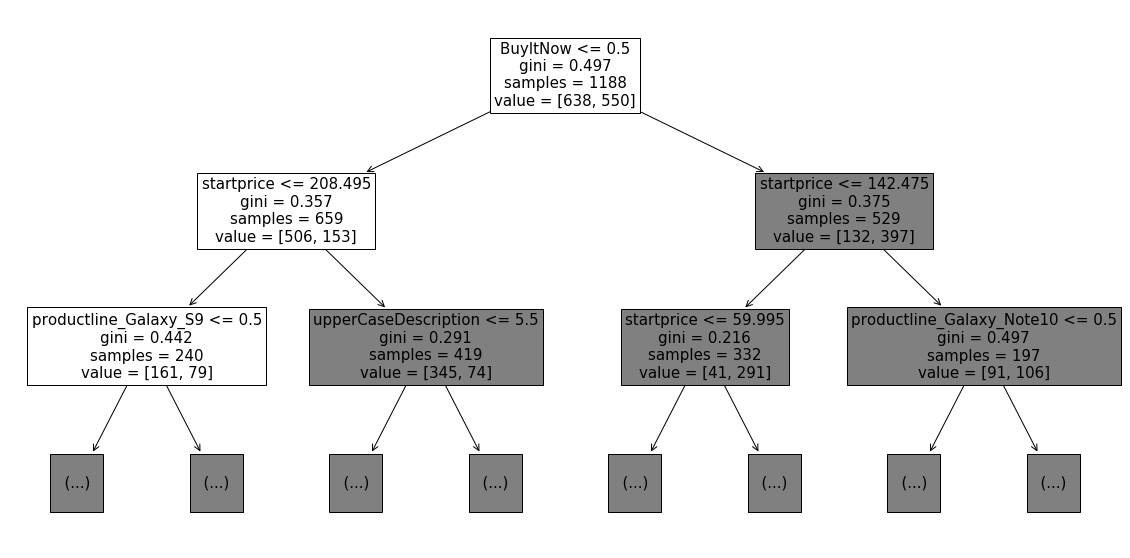

In [42]:
plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = X_train.columns, fontsize = 15, max_depth = 2)

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '\n  (...)  \n'),
 Text(1046.25, 67.94999999999999, '\n  (...)  \n')]

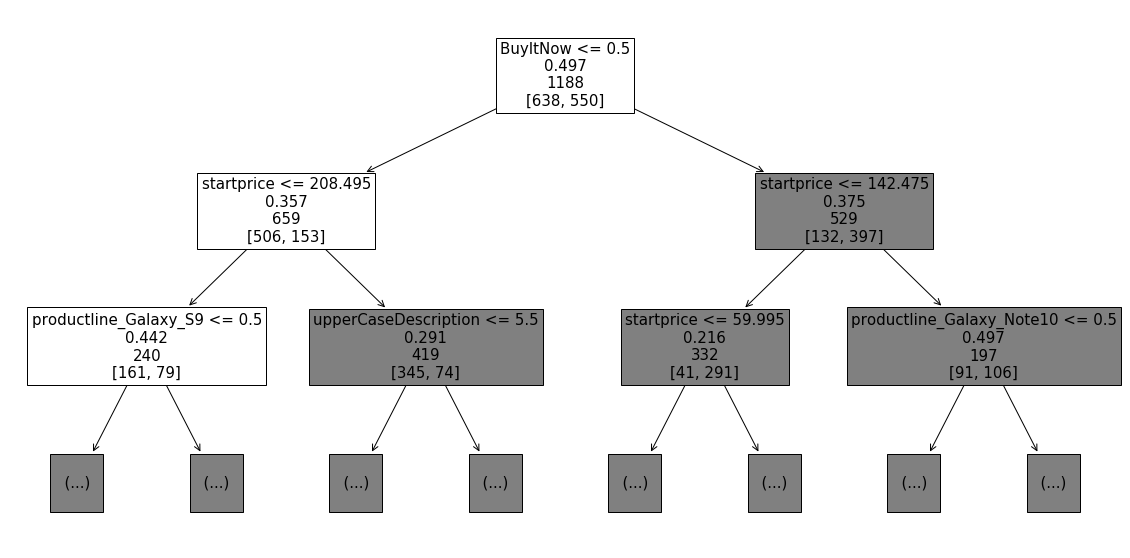

In [41]:
plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = X_train.columns, fontsize = 15, label = 'None', max_depth = 2)
# label은 노드 안에 gini, samples, value 글자 지우는 것.